In [1]:
import os
import pandas as pd

# Replace "path_to_directory" with the actual path where your Excel file is located
os.chdir("Z:\Employee\A Bagwala\Gen AI and Python Stuff\Machine Learning\Employee Turn Over Analytics")

# Load the CSV file into a pandas DataFrame
df = pd.read_excel("Employee Turn Over.xlsx")

# Display the first few rows of the DataFrame
print(df.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 1.0             0.41               4                   174   
1                 1.0             0.74               3                   220   
2                 1.0             0.92               5                   161   
3                 1.0             0.49               3                   185   
4                 1.0             0.66               4                   180   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     0                      0  technical   
1                   4              0     0                      0  technical   
2                   3              1     0                      0    support   
3                   2              0     0                      0      sales   
4                   3              0     0                      0  technical   

  salary  
0    low  
1    low  
2    

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- No Missing Values in the data

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,1.0,0.41,4,174,3,0,0,0,technical,low
1,1.0,0.74,3,220,4,0,0,0,technical,low
2,1.0,0.92,5,161,3,1,0,0,support,low
3,1.0,0.49,3,185,2,0,0,0,sales,low
4,1.0,0.66,4,180,3,0,0,0,technical,low


### Perform One hot encoding and label encoding for Department and salary column respectively. 

In [2]:

# Perform one-not encoding on the 'Department' column
df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=True)

df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1.0,0.41,4,174,3,0,0,0,low,0,0,0,0,0,0,0,0,1
1,1.0,0.74,3,220,4,0,0,0,low,0,0,0,0,0,0,0,0,1
2,1.0,0.92,5,161,3,1,0,0,low,0,0,0,0,0,0,0,1,0
3,1.0,0.49,3,185,2,0,0,0,low,0,0,0,0,0,0,1,0,0
4,1.0,0.66,4,180,3,0,0,0,low,0,0,0,0,0,0,0,0,1


In [3]:
# Perform label encoding on the salary column as it is an ordinal variable

from sklearn.preprocessing import LabelEncoder

# Fit label encoder and transform salary column
encoded_salary = LabelEncoder().fit_transform(df_encoded['salary'])

# Replace the original 'salary' column with the encoded values
df_encoded['salary'] = encoded_salary

# Display the DataFrame after encoding
df_encoded.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1.0,0.41,4,174,3,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1.0,0.74,3,220,4,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1.0,0.92,5,161,3,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1.0,0.49,3,185,2,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1.0,0.66,4,180,3,0,0,0,1,0,0,0,0,0,0,0,0,1


In [4]:
corr = df_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.011754,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.013965,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009672,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.007082,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.003086,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.002506,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.001294,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.001318,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,1.000000,0.022783,-0.002598,0.028232,-0.116202,-0.000906,0.000782,0.015544,0.008054,0.000379
Department_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,0.022783,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755


In [5]:
num_duplicates = df_encoded.duplicated().sum()
num_duplicates

3008

In [6]:
df_unique = df_encoded.drop_duplicates()
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 14913
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   Work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int32  
 9   Department_RandD        11991 non-null  uint8  
 10  Department_accounting   11991 non-null  uint8  
 11  Department_hr           11991 non-null  uint8  
 12  Department_management   11991 non-null  uint8  
 13  Department_marketing    11991 non-null  uint8  
 14  Department_product_mng  11991 non-null

- Dropped Duplicaed records

In [7]:
df_unique.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,1.356184,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.628071,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Pairwise plot is taking too much time to plot and because of higher no. of data points, no clear inference can be drawn. Let's check distribution of sum of 'Left' with each feature variable. 

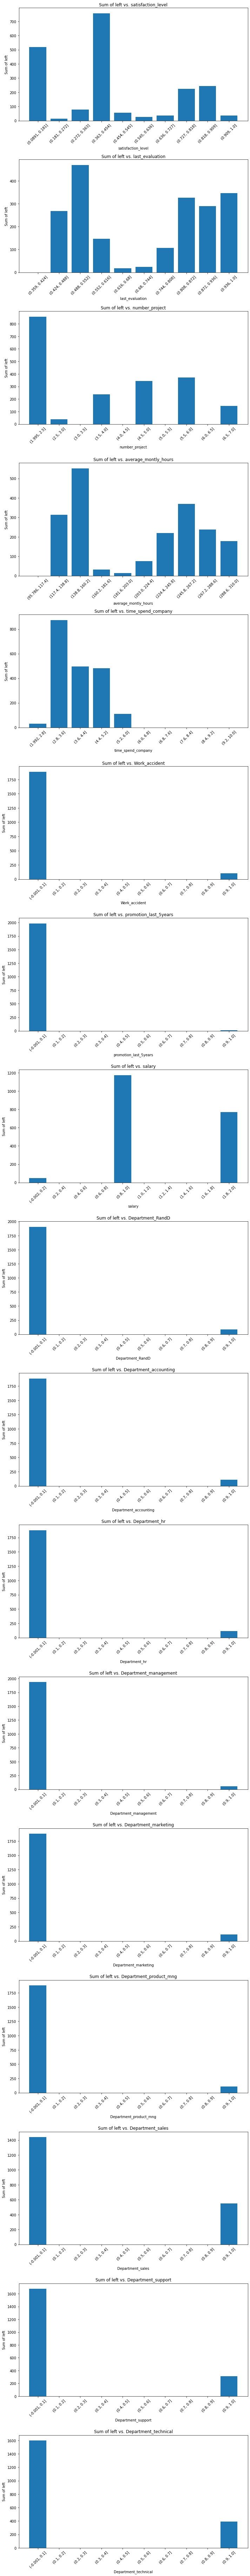

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'target_column' is the name of your target variable column
target_column = 'left'

# Get a list of feature columns (excluding the target variable column)
feature_columns = [col for col in df_unique.columns if col != target_column]

# Create subplots with a number of rows equal to the number of feature columns
num_rows = len(feature_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 6*num_rows))

# Iterate through each feature column
for i, feature_col in enumerate(feature_columns):
    # Bin the feature column into 10 bins
    binned_data = pd.cut(df_unique[feature_col], bins=10)
    
    # Calculate the sum of the target variable for each bin
    summed_data = df.groupby(binned_data)[target_column].sum()
    
    # Plot the binned feature variable against the sum of the target variable
    ax = axes[i]
    ax.bar(summed_data.index.astype(str), summed_data)
    ax.set_xlabel(feature_col)
    ax.set_ylabel('Sum of ' + target_column)
    ax.set_title('Sum of ' + target_column + ' vs. ' + feature_col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Few inferences that can be drawn from the plots.
- Low satisfaction level leads to employees leaving.
- Employees with Higher and Lower ratings in last evaluation, both tend to leave.
- Lower no of projects leads to employees leaving.
- If Monthly hours are too low or too high, employees tend to leave.
- Employess that have spent high number of years in the company do not tend to leave.
- Employees with no work accidents tend to leave.
- Employees with few promotions in the last 5 years tend to leave.
- Employees' tendency to leave reduces as their salary increases.
- Sales, Support and Technical are 3 departments from which employees tend to leave more often than other departments.

In [12]:
df_unique.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1.0,0.41,4,174,3,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1.0,0.74,3,220,4,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1.0,0.92,5,161,3,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1.0,0.49,3,185,2,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1.0,0.66,4,180,3,0,0,0,1,0,0,0,0,0,0,0,0,1


In [9]:
df_unique['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

- Huge imbalance in the data. We will SMOTE the training dataset after train-test splitting and scaling

### Splitting data into train and test.

In [10]:
from sklearn.model_selection import train_test_split

X=df_unique.drop(columns=['left'])
y=df_unique['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

### Scaling the feature variables

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Now SMOTE the train datasets.

In [12]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train_scaled, y_train)

In [13]:
y_train_SMOTE.value_counts()

0    7999
1    7999
Name: left, dtype: int64

### Let's try and fit a Gaussian Naive Bayes model

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_SMOTE, y_train_SMOTE)

# Calculate accuracy
accuracy_train = gnb.score(X_train_SMOTE, y_train_SMOTE)
accuracy_test = gnb.score(X_test_scaled, y_test)
print("Accuracy Train:", accuracy_train)
print("Accuracy Test:", accuracy_test)

Accuracy Train: 0.6780222527815977
Accuracy Test: 0.5360566902876198


In [15]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GaussianNB(), X_train_SMOTE, y_train_SMOTE, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.665      0.674375   0.6809375  0.66583307 0.70428259]
Mean accuracy: 0.6780856322288216


### Let's try and fit a Stochastic Gradient Descent Model using Log Loss/Cost function 

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [17]:

# Initialize SGD classifier. --- Using loss/cost function to be logistic Reg because binary classifcation.
sgd_clf = SGDClassifier(loss='log', random_state=42) 

# Train the model
sgd_clf.fit(X_train_SMOTE, y_train_SMOTE)

# Calculate accuracy
accuracy_train = sgd_clf.score(X_train_SMOTE, y_train_SMOTE)
accuracy_test = sgd_clf.score(X_test_scaled, y_test)
print("Accuracy Train:", accuracy_train)
print("Accuracy Test:", accuracy_test)

Accuracy Train: 0.7931616452056507
Accuracy Test: 0.7507294706127553


In [18]:
y_pred_test = sgd_clf.predict(X_test_scaled)

#Accuracy
accuracy_test = sgd_clf.score(X_test_scaled, y_test)
print("Accuracy:", accuracy_test)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Accuracy: 0.7507294706127553
Precision: 0.38066825775656327
Recall: 0.8015075376884422
F1 Score: 0.5161812297734628
Confusion Matrix:
[[1482  519]
 [  79  319]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2001
           1       0.38      0.80      0.52       398

    accuracy                           0.75      2399
   macro avg       0.67      0.77      0.67      2399
weighted avg       0.86      0.75      0.78      2399



- Test and Train accuracy are good but the model has high false positives, leading to low precision. It has around 542 such scenarios where it predicts the employee will leave, but actually the employee stays.

### Let's Try KNN classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Create the KNN model with n_neighbors (number of neighbors) set to 5
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the model on the training data
model = knn.fit(X_train_SMOTE, y_train_SMOTE)

# Evaluate the model performance on train data (e.g., accuracy score)
from sklearn.metrics import accuracy_score
accuracy_train = model.score(X_train_SMOTE, y_train_SMOTE)
accuracy_test = model.score(X_test_scaled,y_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.966308288536067
Test Accuracy: 0.9228845352230096


In [20]:
y_pred_test = model.predict(X_test_scaled)

#Accuracy
accuracy_test = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy_test)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Accuracy: 0.9228845352230096
Precision: 0.7100591715976331
Recall: 0.9045226130653267
F1 Score: 0.7955801104972375
Confusion Matrix:
[[1854  147]
 [  38  360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2001
           1       0.71      0.90      0.80       398

    accuracy                           0.92      2399
   macro avg       0.84      0.92      0.87      2399
weighted avg       0.94      0.92      0.93      2399



- Precision improved to 71% while simultaneously improving Accuracy to 92% using KNN Classifier. :)

### Let's try GridSearchCV to find best parameters in KNN classifier.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model and hyperparameter grid
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,4,5,6,7],  # Range of neighbors to consider (1 to 10)
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the data
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

# Access the best parameters
best_params = grid_search.best_params_

print(best_params)

{'metric': 'manhattan', 'n_neighbors': 4}


In [29]:
# Use the best parameters to create a new model
best_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])

# Train the best model on the entire training data
best_model.fit(X_train_SMOTE, y_train_SMOTE)

# Use the best model for prediction
y_pred_test = best_model.predict(X_test_scaled)

#Accuracy metrics
accuracy_train = best_model.score(X_train_SMOTE, y_train_SMOTE)
accuracy_test = best_model.score(X_test_scaled,y_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Train Accuracy: 0.980185023127891
Test Accuracy: 0.944560233430596
Precision: 0.7924944812362031
Recall: 0.9020100502512562
F1 Score: 0.8437132784958872
Confusion Matrix:
[[1907   94]
 [  39  359]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2001
           1       0.79      0.90      0.84       398

    accuracy                           0.94      2399
   macro avg       0.89      0.93      0.91      2399
weighted avg       0.95      0.94      0.95      2399



- After hyperparameters tuning, Precision increased to 79%

### Let's apply Logistic Regression now and find it's best hyperparameters.

In [21]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Train the model on the training data
model = log_model.fit(X_train_SMOTE, y_train_SMOTE)


y_pred_test = model.predict(X_test_scaled)
# Evaluate the model performance on train data (e.g., accuracy score)

accuracy_train = model.score(X_train_SMOTE, y_train_SMOTE)
accuracy_test = model.score(X_test_scaled,y_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Train Accuracy: 0.7904738092261533
Test Accuracy: 0.7703209670696123
Precision: 0.4012903225806452
Recall: 0.7814070351758794
F1 Score: 0.5302642796248935
Confusion Matrix:
[[1537  464]
 [  87  311]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2001
           1       0.40      0.78      0.53       398

    accuracy                           0.77      2399
   macro avg       0.67      0.77      0.69      2399
weighted avg       0.86      0.77      0.80      2399



- LR shows very low precision

### Let's try and find best parameters for Logistic Regression model

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the model and hyperparameter grid
model = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse regularization strength
    'solver': ['sag', 'saga', 'lbfgs'],  # Optimization algorithms, not using libliear because it is binary classification
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'] # Using different regularization technique if necessary
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the data
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

# Access the best parameters
best_params = grid_search.best_params_

print(best_params)


C:\Users\asrar.bagwala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\asrar.bagwala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\asrar.bagwala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\asrar.bagwala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\asrar.bagwala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\asrar.bagwala\Anaconda3\lib\site-packages\sklearn\linear_mode

{'C': 10, 'penalty': 'l2', 'solver': 'sag'}


In [21]:
# Use the best parameters to create a new model
best_model = LogisticRegression(C=best_params['C'], solver=best_params['solver'], penalty=best_params['penalty'])

# Train the best model on the entire training data
best_model.fit(X_train_SMOTE, y_train_SMOTE)

# Use the best model for prediction
y_pred_test = best_model.predict(X_test_scaled)

# Evaluate the model performance on train data (e.g., accuracy score)

accuracy_train = best_model.score(X_train_SMOTE, y_train_SMOTE)
accuracy_test = best_model.score(X_test_scaled,y_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

C:\Users\asrar.bagwala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Train Accuracy: 0.7980997624703088
Test Accuracy: 0.7707378074197583
Precision: 0.40379746835443037
Recall: 0.8015075376884422
F1 Score: 0.5370370370370371
Confusion Matrix:
[[1530  471]
 [  79  319]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      2001
           1       0.40      0.80      0.54       398

    accuracy                           0.77      2399
   macro avg       0.68      0.78      0.69      2399
weighted avg       0.86      0.77      0.80      2399



- Even hyperparameterizing doesn't improve Precision in Logistic Regression model.

### Let's try building a decision Tree.

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
#Checking Train and Test Accuracy depending on different Tree Depths.
train_scores, test_scores = list(), list()
values = [i for i in range(1,50)]

for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train_SMOTE, y_train_SMOTE)
    accuracy_train = model.score(X_train_SMOTE, y_train_SMOTE)
    accuracy_test = model.score(X_test_scaled,y_test)
    train_scores.append(accuracy_train)
    test_scores.append(accuracy_test)
    print('>%d, train: %.3f, test: %.3f' % (i, accuracy_train, accuracy_test))

>1, train: 0.786, test: 0.829
>2, train: 0.896, test: 0.850
>3, train: 0.934, test: 0.910
>4, train: 0.944, test: 0.930
>5, train: 0.956, test: 0.942
>6, train: 0.959, test: 0.943
>7, train: 0.971, test: 0.982
>8, train: 0.977, test: 0.983
>9, train: 0.982, test: 0.982
>10, train: 0.985, test: 0.981
>11, train: 0.987, test: 0.981
>12, train: 0.988, test: 0.979
>13, train: 0.992, test: 0.977
>14, train: 0.994, test: 0.975
>15, train: 0.995, test: 0.975
>16, train: 0.996, test: 0.973
>17, train: 0.997, test: 0.970
>18, train: 0.998, test: 0.969
>19, train: 0.999, test: 0.970
>20, train: 0.999, test: 0.971
>21, train: 1.000, test: 0.969
>22, train: 1.000, test: 0.971
>23, train: 1.000, test: 0.968
>24, train: 1.000, test: 0.967
>25, train: 1.000, test: 0.966
>26, train: 1.000, test: 0.969
>27, train: 1.000, test: 0.966
>28, train: 1.000, test: 0.967
>29, train: 1.000, test: 0.967
>30, train: 1.000, test: 0.968
>31, train: 1.000, test: 0.967
>32, train: 1.000, test: 0.966
>33, train: 1.000

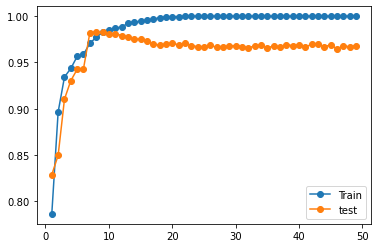

In [25]:
from matplotlib import pyplot

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='test')
pyplot.legend()
pyplot.show()

- After 10 tree depth, the train and Test difference starts increasing.

In [27]:
# Define the model and hyperparameter grid
model = DecisionTreeClassifier()
param_grid = {
    'max_depth':[2,4,6,10,15], 
    'min_samples_split':[2,5,10,15,20,25,30,40,50,100]
}

# Create the GridSearchCV object
best_model = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the data
best_model.fit(X_train_SMOTE, y_train_SMOTE)

# Access the best parameters
best_params = best_model.best_params_

print(best_params)

{'max_depth': 15, 'min_samples_split': 25}


In [28]:
# Use the best parameters to create a new model
best_model = DecisionTreeClassifier(max_depth= 15, min_samples_split= 25)

# Train the best model on the entire training data
best_model.fit(X_train_SMOTE, y_train_SMOTE)

# Use the best model for prediction
y_pred_test = best_model.predict(X_test_scaled)

# Evaluate the model performance on train data (e.g., accuracy score)

accuracy_train = best_model.score(X_train_SMOTE, y_train_SMOTE)
accuracy_test = best_model.score(X_test_scaled,y_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Train Accuracy: 0.9854981872734092
Test Accuracy: 0.9816590245935807
Precision: 0.9609375
Recall: 0.9271356783919598
F1 Score: 0.9437340153452685
Confusion Matrix:
[[1986   15]
 [  29  369]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



- Decision Tree shows the best fit on training data as well as best generalization on test data. Precision is also the highest with Decision Tree.

In [29]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_test)
print(f"AUC Score: {auc_score}")


AUC Score: 0.9598197132589484


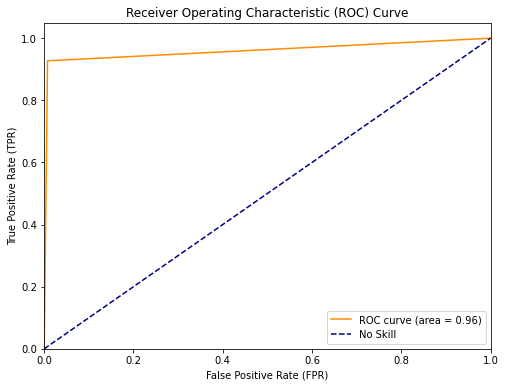

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill')  # Reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


- Curve is hugging the y-axis which means the model is a good classifier.

### Let's try one last technique called Support Vector Machine

In [34]:
from sklearn import svm

In [39]:
ml = svm.SVC() 
  
param_grid = {'C': [0.01, 1, 10, 100], 
              'gamma': [10, 1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
best_model = GridSearchCV(ml, param_grid, cv=5)

best_model.fit(X_train_SMOTE, y_train_SMOTE)

# Access the best parameters
best_params = best_model.best_params_

print(best_params)

{'C': 100, 'gamma': 10, 'kernel': 'rbf'}


In [42]:
# Use the best parameters to create a new model
best_model = svm.SVC(C= 100, gamma=10 ,kernel='rbf')

# Train the best model on the entire training data
best_model.fit(X_train_SMOTE, y_train_SMOTE)

# Use the best model for prediction
y_pred_test = best_model.predict(X_test_scaled)

# Evaluate the model performance on train data (e.g., accuracy score)

accuracy_train = best_model.score(X_train_SMOTE, y_train_SMOTE)
accuracy_test = best_model.score(X_test_scaled,y_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Train Accuracy: 0.9991873984248031
Test Accuracy: 0.9516465193830763
Precision: 0.8405797101449275
Recall: 0.8743718592964824
F1 Score: 0.8571428571428571
Confusion Matrix:
[[1935   66]
 [  50  348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2001
           1       0.84      0.87      0.86       398

    accuracy                           0.95      2399
   macro avg       0.91      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399



- Accuracy is highest among all models but Precision is lower than Decision Tree.

In [43]:
!cd

Z:\Employee\A Bagwala\Gen AI and Python Stuff\Machine Learning\Employee Turn Over Analytics
